## Absolute and Relative Frequency

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## Allows to render plots inlie
%matplotlib inline


In [3]:
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head()

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


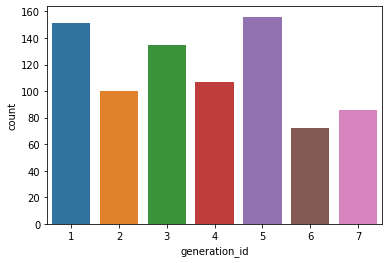

In [4]:
## Semicolon at the end supresses warnings and messages before plotting
sb.countplot(data = pokemon, x = 'generation_id');


The default colors worsen readability. A single color is preferable.

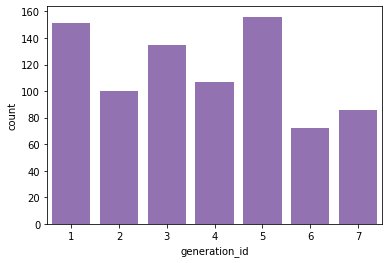

In [9]:
# The `color_palette()` returns the the current / default palette as a list of RGB tuples. 
# Each tuple consists of three digits specifying the red, green, and blue channel values to specify a color. 
# Choose the first tuple of RGB colors
base_color = sb.color_palette()[4]

# Use the `color` argument
sb.countplot(data=pokemon, x='generation_id', color=base_color);




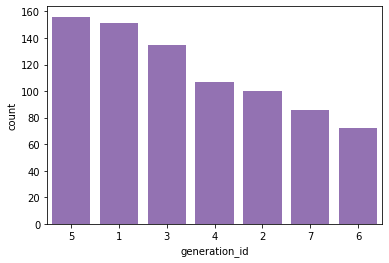

In [16]:
# Sort
sorted_gen = pokemon["generation_id"].value_counts().index
sb.countplot(data=pokemon, x='generation_id', color=base_color, order = sorted_gen);


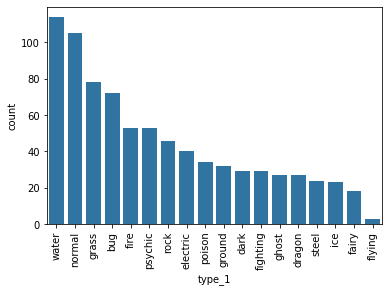

In [22]:
sb.countplot(data = pokemon
             , x ="type_1"
             , order = pokemon["type_1"].value_counts().index
             , color = sb.color_palette()[0])
# Rotate labels 90 degrees for readability
plt.xticks(rotation = 90 ); 

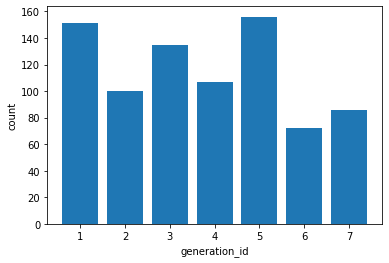

In [26]:
## A similar chart now with matplotlib

x = pokemon['generation_id'].unique()
y = pokemon['generation_id'].value_counts(sort=False)

plt.bar(x, y);

# Labeling the axes
plt.xlabel('generation_id')
plt.ylabel('count')

# Display the plot
plt.show()

These previous plot focused on absolute frequency, i.e. total no. of observations of each value. However relative frequence can also be of interest. In the following example we explore this concept further.

In [27]:
# DataFrame.melt(id_vars, value_vars, var_name, value_name, col_level, ignore_index)

pkmn_types = pokemon.melt(id_vars=['id', 'species'], 
                          value_vars=['type_1', 'type_2'], 
                          var_name='type_level', 
                          value_name='type')
pkmn_types.head(10)

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


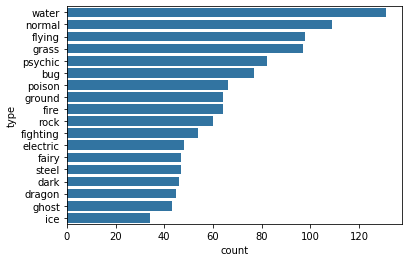

In [28]:

sb.countplot(data = pkmn_types
             , y ='type'
             , color = sb.color_palette()[0]
             , order = pkmn_types['type'].value_counts().index);

So far we just plotted the absolute frequency per pokemon type. How to display this with relation to the total no. of pokemons? 

In [29]:
## Basically we just need to adapt the tick marks to display relative frequencies with the
## underlying data remaining the same

n_pokemons = pokemon.shape[0]
max_type_count = pkmn_types['type'].value_counts()[0]
max_prop = max_type_count / n_pokemons
max_prop

0.1623296158612144

In [30]:
tick_props = np.arange(0, max_prop, 0.02) ## generate sequence of equaly distributed intervals
tick_names = ['{:0.2f}'.format(v) for v in tick_props] ## generate list of lables with 2 decimals

Text(0.5, 0, 'proportions')

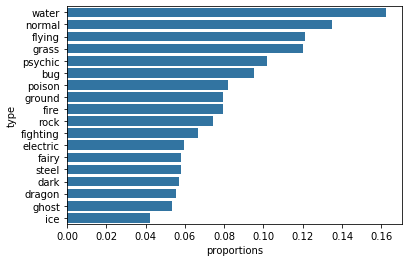

In [35]:
sb.countplot(data = pkmn_types
             , y ='type'
             , color = sb.color_palette()[0]
             , order = pkmn_types['type'].value_counts().index);
plt.xticks(tick_props * n_pokemons, tick_names) ## relabel x axis (first position and then label)
plt.xlabel('proportions')

Another way to display this information is using text annotations to label frequencies on bars. Here's how this goes:

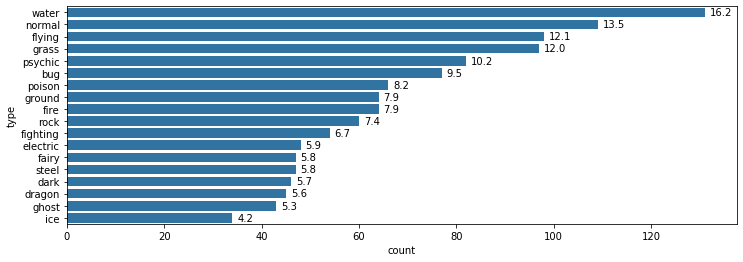

In [44]:
sb.countplot(data = pkmn_types
             , y ='type'
             , color = sb.color_palette()[0]
             , order = pkmn_types['type'].value_counts().index);

# Logic to print the proportion text on the bars
for i in range (pkmn_types['type'].value_counts().shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `type` column in decreasing order.
    count = pkmn_types['type'].value_counts()[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/n_pokemons)
    # Print the string value on the bar. 
    # Read more about the arguments of text() function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)
    plt.text(count+1, i, pct_string, va='center')

In [43]:
## To change figure size

from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 12,4

## Counting missing data

In [46]:
sales_data = pd.read_csv('sales-data.csv')
sales_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [50]:
na_counts = sales_data.isna().sum()[sales_data.isna().sum()>0]

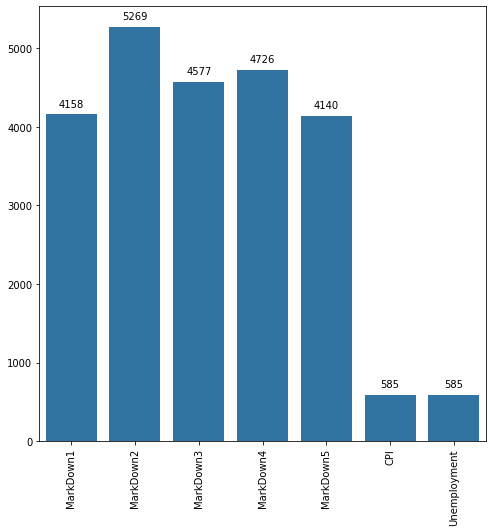

In [63]:
# The first argument to the function below contains the x-values (column names), the second argument the y-values (our counts).
# Refer to the syntax and more example here - https://seaborn.pydata.org/generated/seaborn.barplot.html
rcParams['figure.figsize'] = 8,8
sb.barplot(na_counts.index.values
           , na_counts
           , color = sb.color_palette()[0]);
plt.xticks(rotation=90)
# Logic to print value on each bar
for i in range (na_counts.shape[0]):
    count = na_counts[i]

    # Refer here for details of the text() - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html
    plt.text(i, count+200, count, ha = 'center', va='top')

There is one main difference between `seaborn.countplot` and `seaborn.barplot`. The former is when data is not summarized, and the latter needs the data to be summarizes as it requires to series to work. This could be then also applied, *e.g.* for bivariate data.

## Practice

**TO DO Task 1**
1. Explore the pokemon dataframe, and try to understand the significance of each of its column.
2. There have been quite a few Pokémon introduced over the series' history. Display the count of Pokémon introduced in each generation? Create a bar chart of these frequencies using the 'generation_id' column.

In [65]:
pkmn_types = pokemon.melt(id_vars = ['id','species'], 
                      value_vars = ['type_1', 'type_2'], 
                      var_name = 'type_level', value_name = 'type').dropna()

# Display the frequency of each type.
print('The frequency of each type is:\n', pkmn_types['type_level'].value_counts())

# get order of bars by frequency
type_counts = pkmn_types['type'].value_counts()
type_order = type_counts.index

# Compute largest proportion
# Returns the sum of all not-null values in `type` column
n_pokemon = pkmn_types['type'].value_counts().sum()
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon

The frequency of each type is:
 type_1    807
type_2    405
Name: type_level, dtype: int64
